                 age        overall
count  180021.000000  180021.000000
mean        4.378550      65.712711
std         2.838621       7.018104
min         0.000000      40.000000
25%         2.000000      61.000000
50%         4.000000      66.000000
75%         7.000000      70.000000
max         9.000000      94.000000


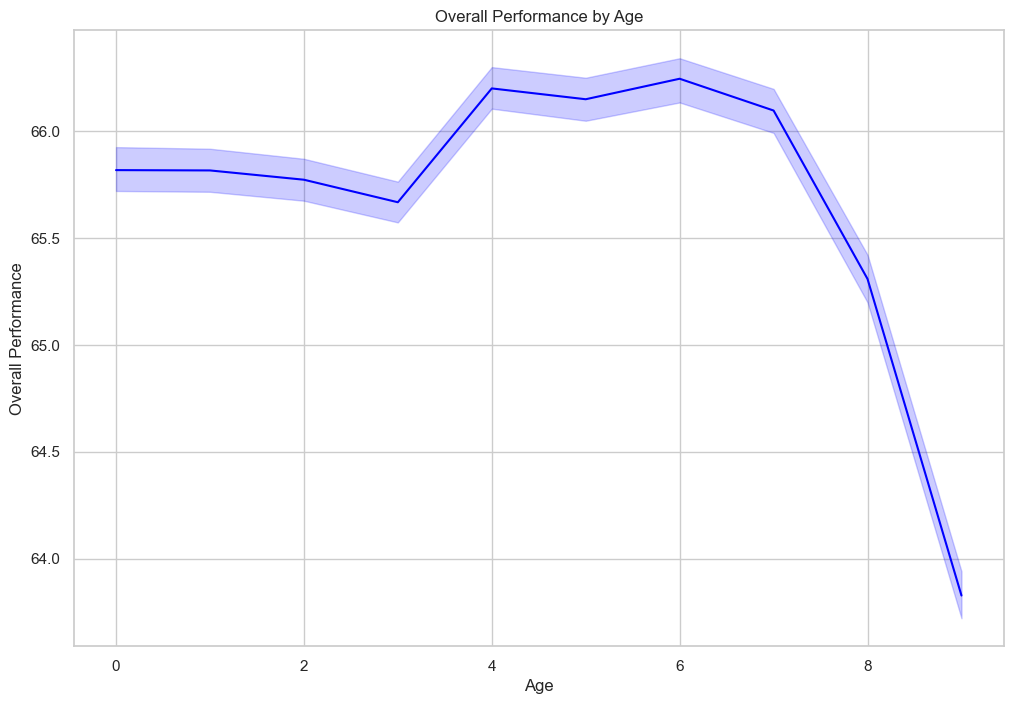

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV files and make necessary adjustments
male_players = pd.read_csv("male_players.csv", parse_dates=["update_as_of"], low_memory=False)

# Format the date
current_year = pd.to_datetime("today").year
male_players["age"] = current_year - male_players["update_as_of"].dt.year

# Display basic statistical information
print(male_players[["age", "overall"]].describe())

# Draw a line plot showing overall performance by age
plt.figure(figsize=(12, 8))
sns.lineplot(data=male_players, x="age", y="overall", err_style="band", color="blue")
plt.title("Overall Performance by Age")
plt.xlabel("Age")
plt.ylabel("Overall Performance")
plt.show()


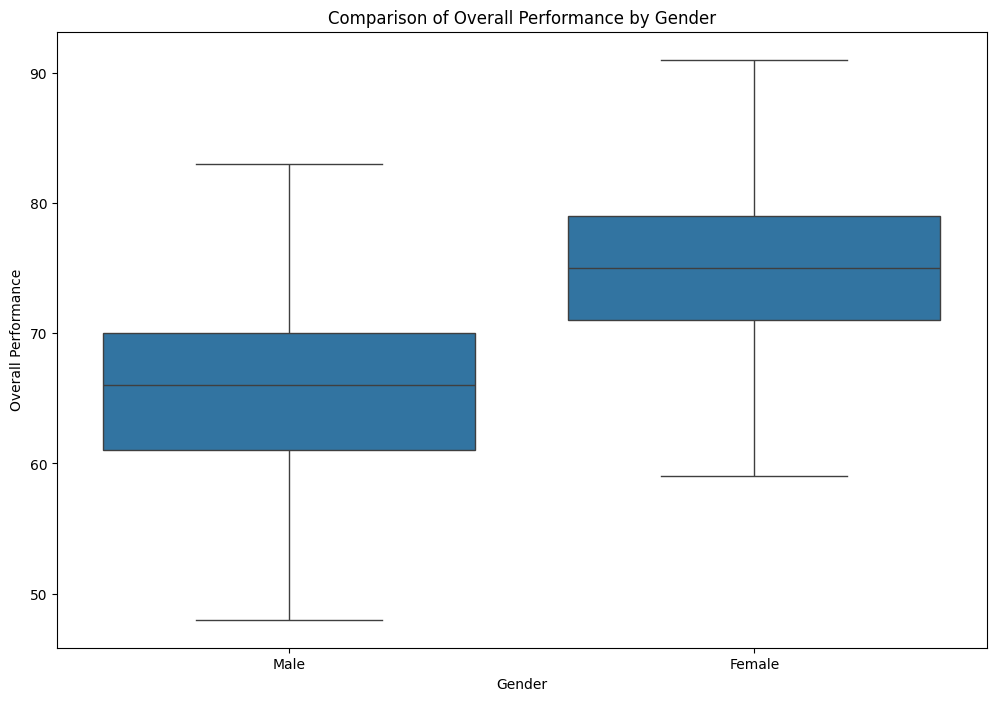

In [5]:
# Load CSV files
male_players = pd.read_csv("male_players.csv", parse_dates=["update_as_of"], low_memory=False)
female_players = pd.read_csv("female_players.csv", parse_dates=["update_as_of"], low_memory=False)

# Comparison of overall performance by gender
plt.figure(figsize=(12, 8))
sns.boxplot(x="gender", y="overall", data=pd.concat([male_players.assign(gender="Male"), female_players.assign(gender="Female")]), showfliers=False)
plt.title("Comparison of Overall Performance by Gender")
plt.xlabel("Gender")
plt.ylabel("Overall Performance")
plt.show()


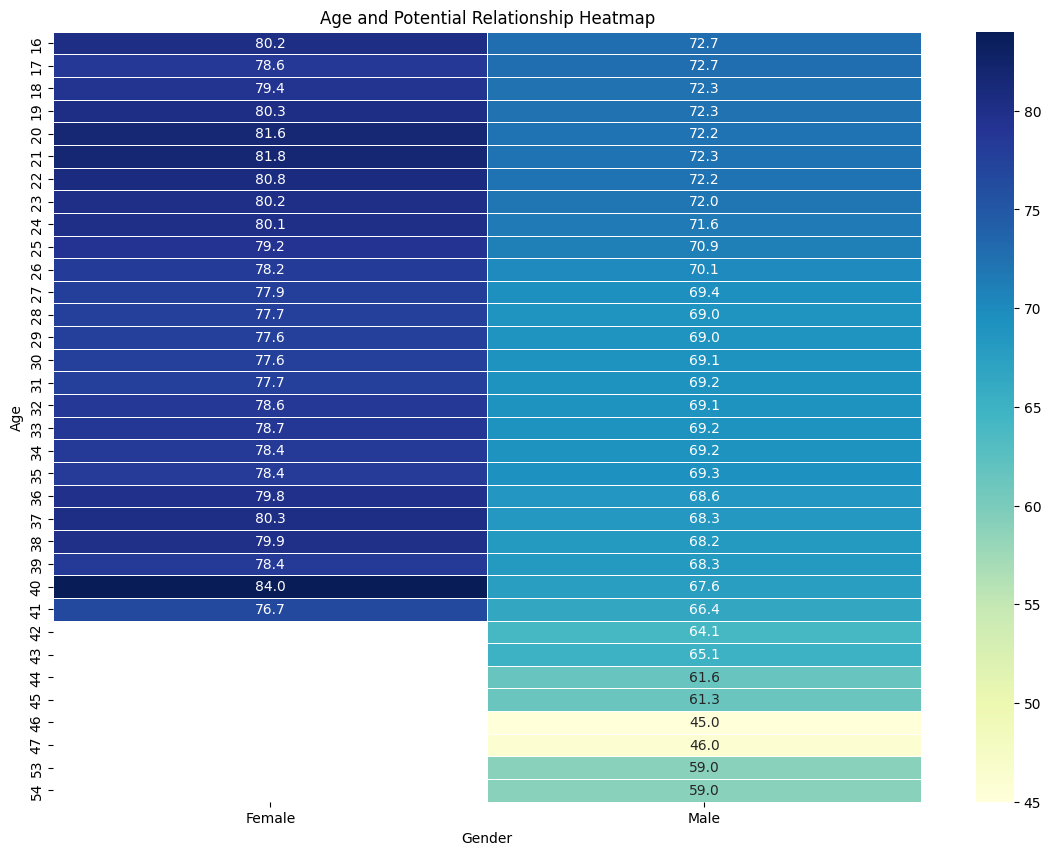

In [7]:
# Load CSV files
male_players = pd.read_csv("male_players.csv", parse_dates=["update_as_of"], low_memory=False)
female_players = pd.read_csv("female_players.csv", parse_dates=["update_as_of"], low_memory=False)

# Merge the data
all_players = pd.concat([male_players.assign(gender="Male"), female_players.assign(gender="Female")])

# Heatmap showing the relationship between age and potential
plt.figure(figsize=(14, 10))
sns.heatmap(all_players.pivot_table(index="age", columns="gender", values="potential", aggfunc="mean"), cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5)
plt.title("Age and Potential Relationship Heatmap")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()


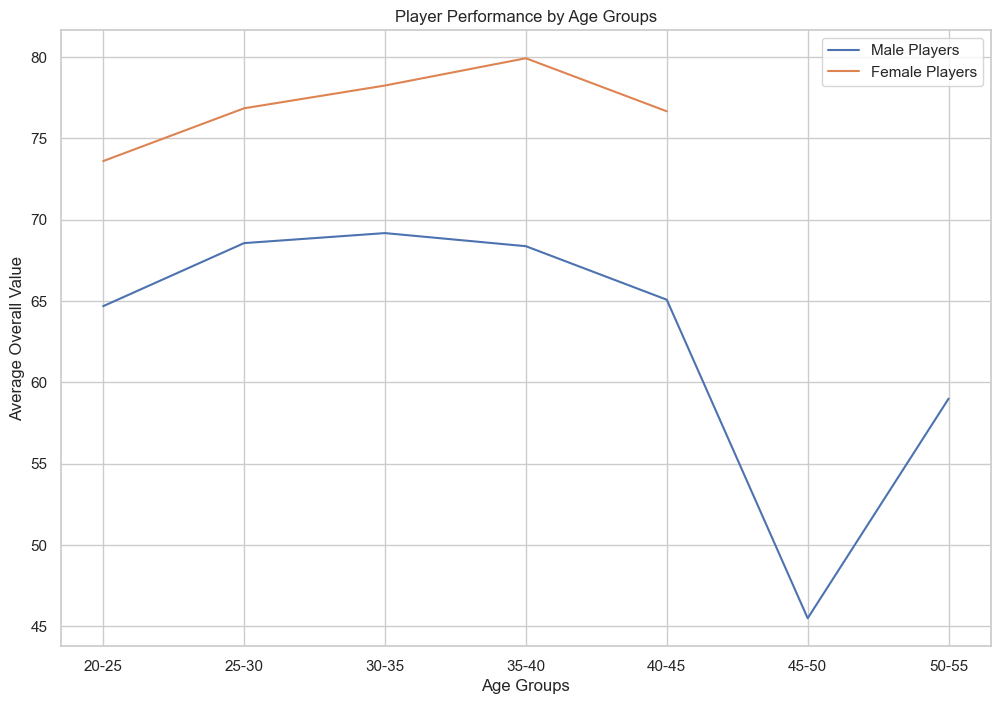

In [28]:
# Load the dataset
male_players = pd.read_csv("male_players.csv", low_memory=False)
female_players = pd.read_csv("female_players.csv", low_memory=False)

# Select only the relevant columns
male_age_overall = male_players[["age", "overall"]].copy()  # Copy the data to avoid SettingWithCopyWarning
female_age_overall = female_players[["age", "overall"]].copy()  # Copy the data to avoid SettingWithCopyWarning

# Define age groups (e.g., 20-25, 26-30, ...)
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
age_labels = [f"{age_bins[i]}-{age_bins[i+1]}" for i in range(len(age_bins)-1)]

# Split the data into age groups and take the mean
male_age_overall['age_group'] = pd.cut(male_age_overall['age'], bins=age_bins, labels=age_labels, include_lowest=True)
female_age_overall['age_group'] = pd.cut(female_age_overall['age'], bins=age_bins, labels=age_labels, include_lowest=True)

male_age_grouped = male_age_overall.groupby('age_group', observed=False).mean()
female_age_grouped = female_age_overall.groupby('age_group', observed=False).mean()

# Visualization
plt.figure(figsize=(12, 8))
sns.lineplot(data=male_age_grouped, x=male_age_grouped.index, y="overall", label="Male Players")
sns.lineplot(data=female_age_grouped, x=female_age_grouped.index, y="overall", label="Female Players")

plt.title("Player Performance by Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Average Overall Value")
plt.legend()
plt.show()


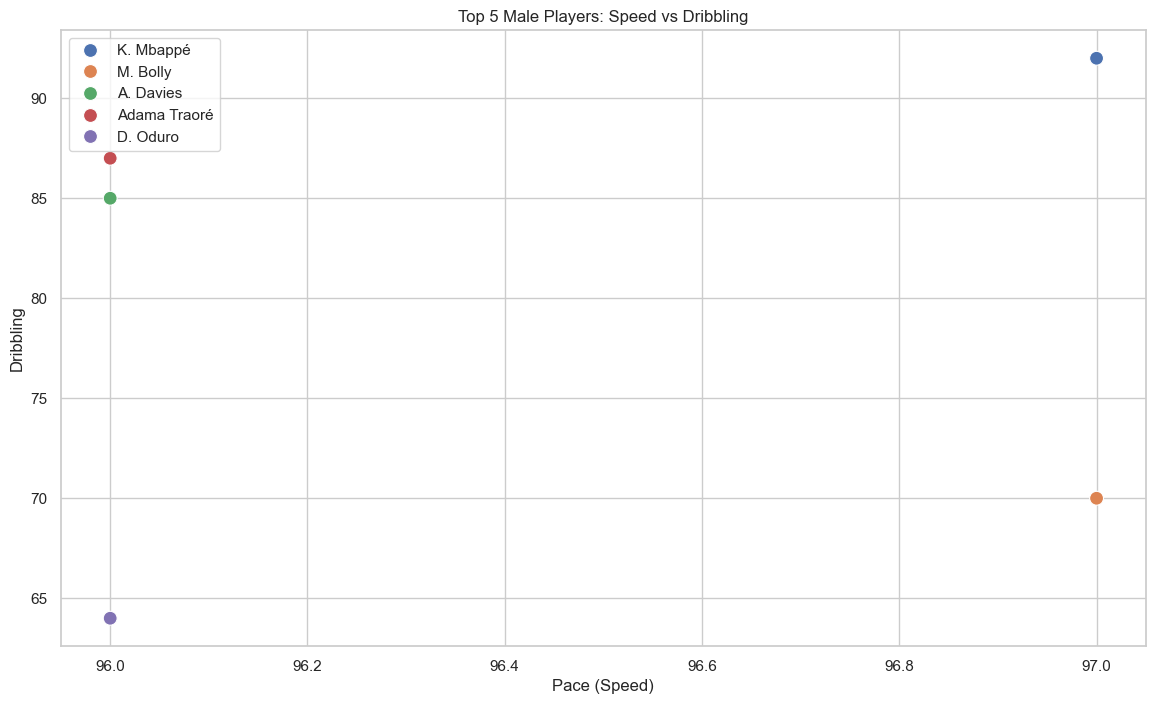

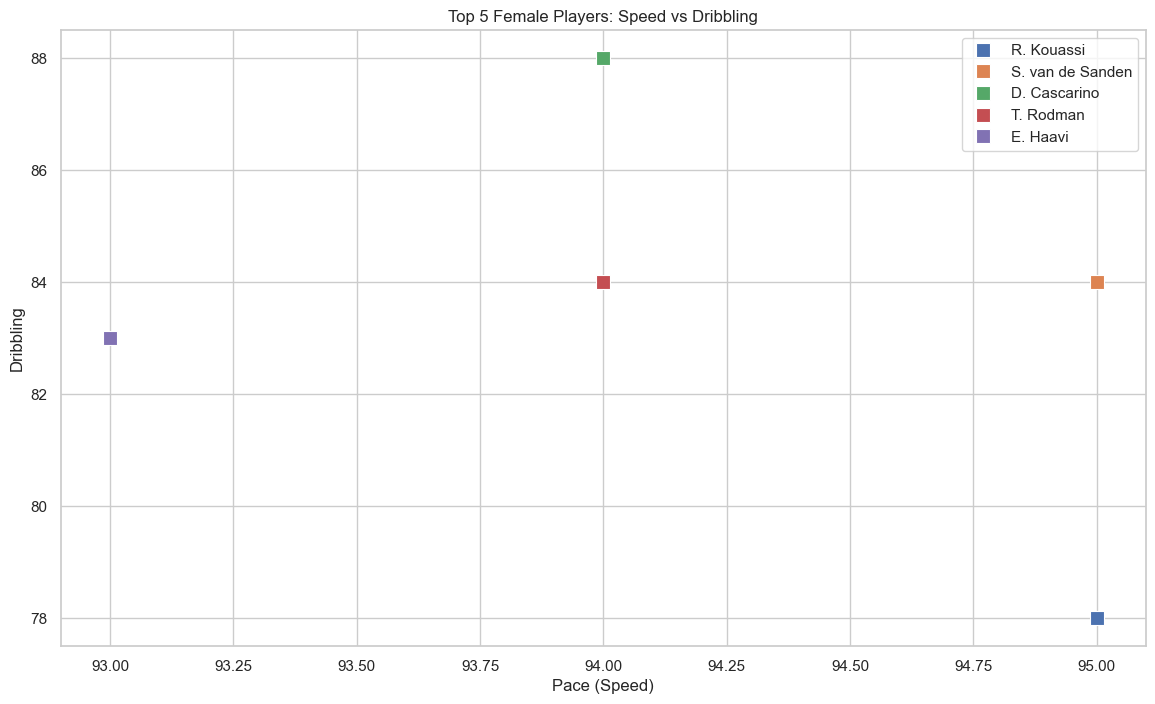

In [41]:
# Load the dataset
male_players = pd.read_csv("male_players.csv", low_memory=False)
female_players = pd.read_csv("female_players.csv", low_memory=False)

# Keep only the relevant columns
male_speed_dribbling = male_players.groupby("short_name")[["pace", "dribbling"]].max().reset_index().dropna()
female_speed_dribbling = female_players.groupby("short_name")[["pace", "dribbling"]].max().reset_index().dropna()

# Get the top 5 male and female players based on pace
top_male_players = male_speed_dribbling.nlargest(5, "pace")
top_female_players = female_speed_dribbling.nlargest(5, "pace")

# Visualization for top 5 male players
plt.figure(figsize=(14, 8))
sns.scatterplot(data=top_male_players, x="pace", y="dribbling", hue="short_name", s=100, marker="o", legend="full")

plt.title("Top 5 Male Players: Speed vs Dribbling")
plt.xlabel("Pace (Speed)")
plt.ylabel("Dribbling")
plt.legend()
plt.show()

# Visualization for top 5 female players
plt.figure(figsize=(14, 8))
sns.scatterplot(data=top_female_players, x="pace", y="dribbling", hue="short_name", s=100, marker="s", legend="full")

plt.title("Top 5 Female Players: Speed vs Dribbling")
plt.xlabel("Pace (Speed)")
plt.ylabel("Dribbling")
plt.legend()
plt.show()
